# Python til tabeldata

## Dagens workshop

I dag arbejder vi videre med, hvordan python bruges til tabeldata. Vi skal blandt andet igennem, hvordan python bruges til simpel statistik og modeller, samt hvordan vi løser forskellige datahåndteringsproblemer.

### Program
- Genopfriskning fra del 1
- Lineær regression med `scikit-learn`
- Plots med `seaborn`
- Håndtering af kategoriske data
- Håndtering af missing
- Kombinering af data

## Genopfriskning fra del 1

In [53]:
#Indlæs data
import pandas as pd
ess = pd.read_csv('https://github.com/CALDISS-AAU/workshop_python-table-data/raw/master/data/ESS2014DK_subset.csv')

In [54]:
#Inspicer første 5 rækker af pandas dataframe
ess.head()

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn
0,921018,6,9,Very good,10.0,2-3 times a month,178.0,64.0,Male,1990
1,921026,8,8,Very good,NaN,Several times a week,172.0,64.0,Female,1948
2,921034,8,8,Good,NaN,Every day,176.0,87.0,Male,1957
3,921076,8,8,Good,NaN,Several times a week,162.0,70.0,Female,1958
4,921084,5,8,Very good,NaN,Every day,175.0,80.0,Male,1936


In [55]:
#Kolonner kan referes til ved navn (returnerer som en pandas serie)
ess['cgtsday'].head()

0    10.0
1     NaN
2     NaN
3     NaN
4     NaN
Name: cgtsday, dtype: float64

In [56]:
#Vi kan inspicere typen med .dtypes (float64 = decimaltal)
ess['cgtsday'].dtypes

dtype('float64')

In [57]:
#Dele af data kan specificeres med .loc (rækker, kolonner)
ess.loc[10:15, 'cgtsday'] #Returneres som serie

10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15    10.0
Name: cgtsday, dtype: float64

In [58]:
#Flere kolonner specificeres ved at sætte dem ind i liste
ess.loc[10:15, ['happy', 'cgtsday']] #Returneres som data frame

,happy,cgtsday
10,8,NaN
11,4,NaN
12,8,NaN
13,8,NaN
14,9,NaN
15,Extremely happy,10.0


In [59]:
#Bestemte rækker specificeres ved at sætte kriterie(r)
ess.loc[ess['cgtsday'] == 10, ['cgtsday','happy']].head() #Returneres som data frame

,cgtsday,happy
0,10.0,9
15,10.0,Extremely happy
39,10.0,Extremely happy
49,10.0,4
121,10.0,9


In [60]:
#Nye variable dannes ved at referere til variabel/kolonne, som endnu ikke er i datasætttet
ess['bmi'] = ess['weight'] * (ess['height']/100)**2

## ØVELSE 0: Opvarmning

1. Indlæs ESS datasættet fra sidste gang 

    `pd.read_csv('https://github.com/CALDISS-AAU/workshop_python-intro/raw/master/data/ESS2014DK_subset.csv')`
    
    
2. Lav en aldersvariabel (datasættet er fra 2014)

## Modeller/estimater i python

Typisk arbejder vi i samfundsvidenskab med statistisker modeller til at producere estimater: Hvor meget bliver Y påvirket af X, og hvor sikre er vi på det estimat?

I Neighborhood AI beskæftiger os vi med machine learning, hvor nogen af de samme modeller, som I kender fra statistik også bliver brugt. Her er det dog anderledes, da vi ikke beskæftiger os med, hvor godt et estimat, X, kan forklare Y, men i stedet er interesseret i, hvor godt vi kan forudsige Y. 

Vi skifter altså fokus væk fra forklaringskraften af et enkelte estimater til at fokusere på hvor mange estimater, der skal til for at kunne forudsige Y.


I denne workshop arbejder vi med scikit learn, som er et pakkebibliotek udviklet specifikt til machine learning. 

Måden man specificerer og bruger modeller (fx lineær regression) er derfor anderledes, da man netop har dette andet sigte.

## Hvordan fordeler data sig?

Som altid er det godt at gøre sig bekendt med sine data.

Vi har tidligere set, hvordan vi kan producere forskellige deskriptive mål (`.describe()`, `.min()`, `.max()` osv.)

En anden måde at blive bekendt med data er gennem plotting. Vi ser her nærmere på `seaborn` pakken til at lave forskellige visualiseringer.

`seaborn` bygger oven på pakken `matplotlib`, hvorfor begge pakker bruges.

In [62]:
import matplotlib.pyplot as plt #importerer pyplot for matplotlib - bruges til at sætte størrelse osv.
import seaborn as sns #seaborn importeres
%matplotlib inline 
#indstilling for jupyter notebook: plots skal printes i notebook
sns.set() #indstillinger for seaborn (her standardindstillinger)

In [63]:
data = sns.load_dataset("iris") #vi indlæser et test datasæt

data.head() #inspicerer første 5 rækker

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


`seaborn` kan danne et gitter af scatterplots i variable i datasættet med `pairplot`. Dette kan give os et umiddelbart overblik.

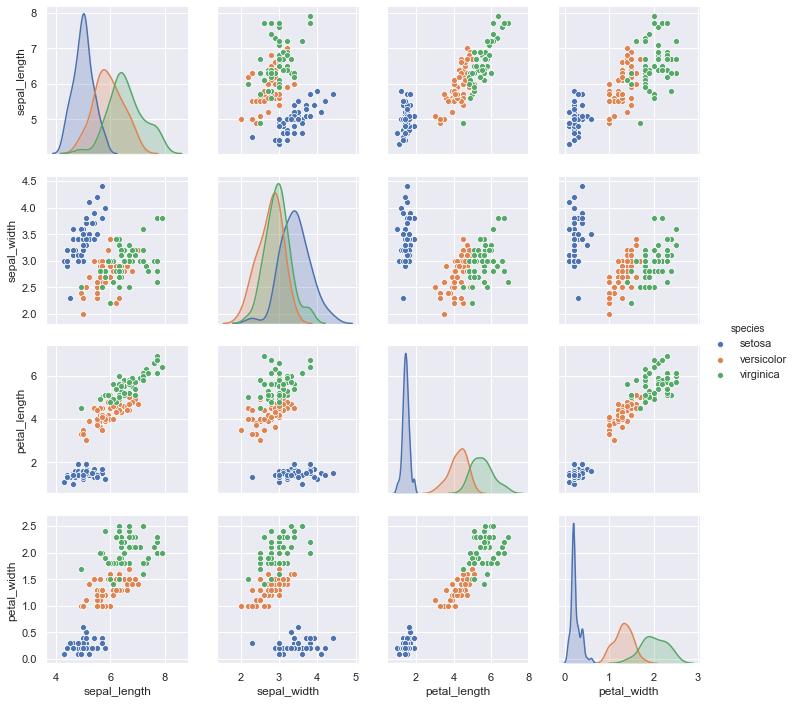

In [64]:
sns.pairplot(data, hue='species', height = 2.5)

Lad os se nærmere på sammenhængen mellem "petal length" og "petal width"

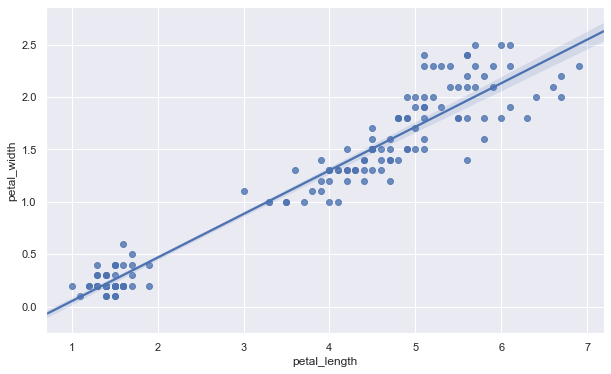

In [110]:
plt.figure(figsize=(10,6)) #sætter størrelsen på figuren
sns.regplot(x = 'petal_length', y = 'petal_width', data = data) #regplot - scatterplot med fitted regressionslinje

Grafen indikerer, at for at kunne forudsige bredden af petals, skal vi vide nogen om længden (sjovt nok).

For at gøre det simpel prøver vi at modellere med lineær regression. Som sagt er tankegangen dog lidt anderledes, når vi taler machine learning. Vi bruger ikke modellen til at forklare, hvad der øger bredden af petals, men vi laver en model, som kan bruges til at forudsige bredden af petals.

**Lineær regression i python med scikit learn**
- Specificer modellen: `model = LinearRegression`
- Specificer X og Y: `X = pd.DataFrame(data['petal_length']), Y = data['petal_width']`
- Fit modellen: `model.fit(X, Y)`
- Print ønskede outputs: `print(model.coef_, model.score(X, Y)`

Vi bruger pakken scikit-learn (`sklearn`) til at modellere den lineære regression. Dette for at give en forståelse for, hvordan modeller specificeres i denne pakke.

Først importeres og specificeres modellen. Der laves altså en tom model først, som vi bagefter giver et vis input.

In [66]:
from sklearn.linear_model import LinearRegression #Modellen importeres fra scikit
model = LinearRegression() #Modellen specficeres
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

X og Y specificeres.

Bemærk, at X skal specificeres som dataframe (2 dimensioner), mens Y specificeres som serie (1 dimension). Modellen forventer 2 dimensioner af X, da der kan være flere X-værdier.

`.to_frame()` konverterer en serie til en dataframe.

In [67]:
X = data['petal_length'].to_frame() #X specificeret som dataframe
Y = data['petal_width'] #Y specificeret som serie

Modellen "fodres" nu med input. Modellen "fittes".

In [68]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Når modellen er fitted, kan vi bede om forskellige outputs. Fx koefficienterne, skæringspunktet og R<sup>2</sup>.

In [69]:
print("Modellens skæringspunk:", model.intercept_)
print("Model hældning:        ", model.coef_[0])
print("R2                     ", model.score(X, Y))

Modellens skæringspunk: -0.3630755213190291
Model hældning:         0.41575541635241153
R2                      0.9271098389904927


## ØVELSE 1: Lineær modellering

1. Indlæs iris datasættet med `sns.data_load("iris")` (sørg for at `seaborn` er importeret med alias `sns`)
2. Inspicer fordelingen af petal length og sepal length med `sns.regplot(X, Y, data)`
3. Lav lineær regression model med sepal length som X værdi og petal length som Y værdi
    - Husk at X skal specificeres som dataframe og Y som serie
4. Hvad er hældningen? (`.coef_`)

## Lineær modellering med ESS

Lad os nu se nærmere på ESS dataen. Det vil være rimeligt at antage, at personers højde hænger sammen med deres vægt, så lad os kigge nærmere på dette:

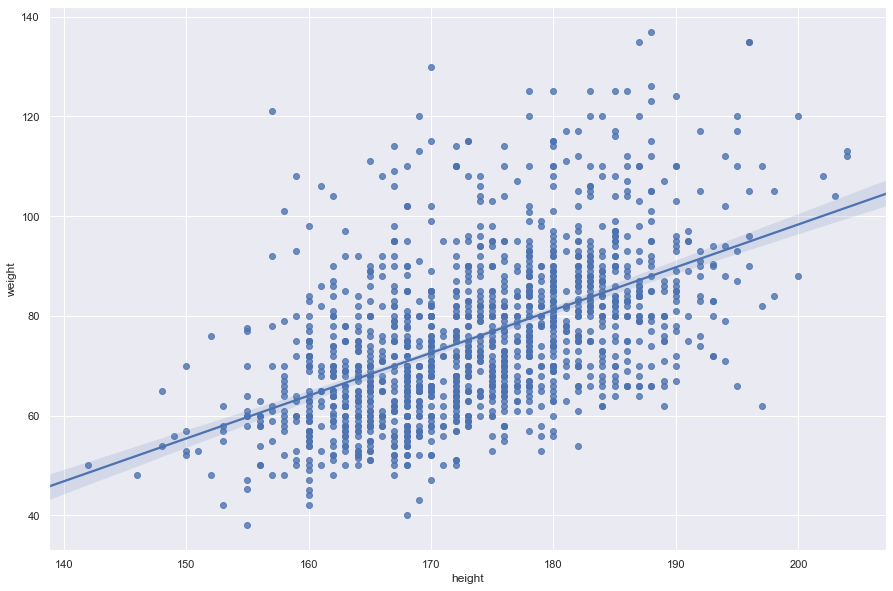

In [70]:
plt.figure(figsize=(10,6)) #sætter størrelsen på figuren
sns.regplot(x = 'height', y = 'weight', data = ess) #scatterplot af højde og vægt med fitted regressionslinje

Det tyder på en lineær sammenhæng, så lad os prøve at modellere det.

ESS data har samme format som iris: dataframe med rækker og kolonner. Kolonnerne vi kigger på indeholder også numeriske værdier (kan tjekkes med `.dtypes`).

Modellen bør derfor umiddelbart kunne laves på samme måde:

In [71]:
from sklearn.linear_model import LinearRegression #Modellen importeres fra scikit
model = LinearRegression() #Modellen specficeres

X = ess['height'].to_frame() #X som dataframe
Y = ess['weight'] #Y som serie

model.fit(X, Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Det giver dog fejl - hvorfor?

## Behandling af missing

Scikit-learn har ikke indbyggede funktioner til håndtering af missing. For at kunne bruge modellerne i scikit-learn, skal missingværdier derfor håndteres først. Missing håndteres på en af to måder:

- Rækker med missing fjernes (listwise deletion)
- Værdier "imputeres"; dvs. erstattes med en bestemt værdi.

I dag gennemgås blot hvordan missing fjernes eller erstattes med enkelte værdier.

### Fjern eller erstat missing

En pandas dataframe (og serie) har flere indbyggede metoder til at håndtere missing. De mest simple er:

- `.dropna()`: listwise deletion af observationer, som indeholder missing værdier
- `.fillna()`: erstatter missing med en angiven værdi

Derudover findes også disse metoder, som særligt er egnet til tidsserie data:

- `ffill()`: erstatter missing værdi med værdien i næste række eller kolonne
- `bfill()`: erstatter missing værdi med værdien i forrige række eller kolonne

In [101]:
ess['cgtsday'].head() #oprindelig data

0    10.0
1     NaN
2     NaN
3     NaN
4     NaN
Name: cgtsday, dtype: float64

In [102]:
ess['cgtsday'].dropna().head() #data med missing fjernet - læg mærke til rækkenummer

0     10.0
8     20.0
15    10.0
20     1.0
21    40.0
Name: cgtsday, dtype: float64

In [104]:
ess['cgtsday'].fillna(0).head() #data med missing erstattet med 0

0    10.0
1     0.0
2     0.0
3     0.0
4     0.0
Name: cgtsday, dtype: float64

Fill kan også bruges til at erstatte med middelværdi eller prædikterede værdier.

In [105]:
cgts_fill = ess['cgtsday'].mean()
ess['cgtsday'].fillna(cgts_fill).head() #erstat missing med middelværdi

0    10.0
1    12.0
2    12.0
3    12.0
4    12.0
Name: cgtsday, dtype: float64

In [106]:
cgts_fill_m = round(ess.loc[ess['gndr'] == 'Male', 'cgtsday'].mean())
cgts_fill_f = round(ess.loc[ess['gndr'] == 'Female', 'cgtsday'].mean())

def cgts_fill( gndr ):
    if gndr == 'Male':
        return(cgts_fill_m)
    elif gndr == 'Female':
        return(cgts_fill_f)

ess['cgtsday'].fillna(ess['gndr'].map(cgts_fill)).head() #erstat med middel for køn

0    10.0
1    11.0
2    13.0
3    11.0
4    13.0
Name: cgtsday, dtype: float64

Bemærk at vi ved at kalde metoderne ikke ændrer på noget. Vi skal derfor overskrive data eller lave kopi af data. 

Som altid er det bedst at bevare det oprindelige datasæt. 

Samtidig giver det i arbejde med modeller som disse mening at tænke det sådan, at man arbejder hen mod en udgave af datasættet, som skal bruges til en bestemt model.

## FÆLLESØVELSE: Hvordan får vi lavet en model mellem højde og vægt?

Lad os prøve at se om vi kan løse problemet med højde og vægt...

In [ ]:
ess_mdata = ess.dropna() #kopi af datasæt hvor missingværdier fjernes

X = ess_mdata['height'].to_frame()
Y = ess_mdata['weight']

model.fit(X, Y)
print("Modellens skæringspunk:", model.intercept_)
print("Model hældning:        ", model.coef_[0])
print("R2                     ", model.score(X, Y))

## Hvad med andre variabeltyper?

Vi har nu set på, hvordan vi modellerer med numeriske variable. Som det ses af datasættet, er der også andre typer variable.

In [107]:
ess.head()

,idno,ppltrst,happy,health,cgtsday,alcfreq,height,weight,gndr,yrbrn,bmi,happycat,drink_weekly,happy_num
0,921018,6,9,Very good,10.0,2-3 times a month,178.0,64.0,Male,1990,202.7776,9,False,9.0
1,921026,8,8,Very good,NaN,Several times a week,172.0,64.0,Female,1948,189.3376,8,True,8.0
2,921034,8,8,Good,NaN,Every day,176.0,87.0,Male,1957,269.4912,8,True,8.0
3,921076,8,8,Good,NaN,Several times a week,162.0,70.0,Female,1958,183.7080,8,True,8.0
4,921084,5,8,Very good,NaN,Every day,175.0,80.0,Male,1936,245.0000,8,True,8.0


Lad os for øvelsens skyld behandle "happy" som interval og se, hvordan variablen udvikler sig med alderen:

TypeError: Could not convert 988888Extremely happy98884889Extremely happy99989Extremely happy9Extremely happy96Extremely happy899889998876Extremely happy3Extremely happy8759Extremely happyExtremely happy14797Extremely happy938969898888Extremely happyExtremely happy8Extremely happy7899Extremely happy9Extremely happy8Extremely happy8889Extremely happy3989989Extremely happy98997889885Extremely happy89297879Extremely happy989889259Extremely happy99Extremely happy898Extremely happy988Extremely happy789Extremely happy99Extremely happy9987Extremely happyExtremely happy8979998898Extremely happy5988999Extremely happy89Extremely happy7788Extremely happy96958878857989Extremely happy9Extremely happy8Extremely happy88898Extremely happy7899Extremely happyExtremely happy996988598Extremely happy9978Extremely happy98597979Extremely happy958987Extremely happy989299767999899888Extremely happyExtremely happy8Extremely happyExtremely happy9999989Extremely happy587999969879Extremely happy998995879598Extremely happy988879888Extremely happy7759Extremely happy9Extremely happy8788Extremely happy1Extremely happy9Extremely happy86982Extremely happy9879976Extremely happy784Extremely happy59Extremely happy9Extremely happy88Extremely happyExtremely happy8987Extremely happy99Extremely happy89898Extremely happy7Extremely happy999889888628Extremely happy87867Extremely happy989Extremely happy96788866968Extremely happy8Extremely happy6Extremely happyExtremely happy8Extremely happyExtremely happy88979Extremely happy65978Extremely happyExtremely happyExtremely happyExtremely happy889Extremely happy97Extremely happy997Extremely happyExtremely happyExtremely happyExtremely happyExtremely happy989Extremely happy889Extremely happy81878Extremely happy8979797878878888889Extremely happyExtremely happy988Extremely happy59Extremely happy997Extremely happy7Extremely happy86417996688889Extremely happy887Extremely happy9979Extremely happy99898Extremely happyExtremely happy8Extremely happyExtremely happy97675967Extremely happy699Extremely happy7876988878Extremely happy9Extremely happy9699Extremely happyExtremely happy888993Extremely happy7Extremely happyExtremely happy9979Extremely happyExtremely happy8Extremely happy89956Extremely happy999927Extremely happy887Extremely happy99998Extremely happy87898Extremely happyExtremely happy9Extremely happy8Extremely happy8993989883795879887Extremely happy888Extremely happy8989878Extremely happy988Extremely happy7998Extremely happy978879Extremely happy86Extremely happy989988889989Extremely happy98886988Extremely happy79Extremely happy7Extremely happy959888789988Extremely happyExtremely happyExtremely happy6799Extremely happyExtremely happy986Extremely happy779Extremely happy897798Extremely happy888Extremely happy68Extremely happy976Extremely happyExtremely happy89899968984889997988999Extremely happy889958Extremely happy879939778Extremely happy9999838779Extremely happyExtremely happy99Extremely happy8Extremely happyExtremely happy879Extremely happy39899Extremely happy789Extremely happy98Extremely happy9768Extremely happy8889Extremely happy89879998988898Extremely happy99995Extremely happy989989889Extremely happy68Extremely happy77898Extremely happy9899885Extremely happy879899879Extremely happy8Extremely happyExtremely happy98988Extremely happyExtremely happy5987Extremely happyExtremely happy889Extremely happy8Extremely happy8388Extremely happy999398987Extremely happy89878788789Extremely happy788987Extremely happy9789787Extremely happy986Extremely happyExtremely happy962988889Extremely happy77889Extremely happy799867Extremely happy9Extremely happy9979798Extremely happy9Extremely happy858Extremely happy89888893848Extremely happy999Extremely happy78999Extremely happy968998888Extremely happy86876799Extremely happy96Extremely happyExtremely happy8988816639988948829Extremely happy7Extremely happy79Extremely happy5993Extremely happy8989Extremely happyExtremely happy959975Extremely happy86Extremely happy8799967Extremely happy999889878Extremely unhappy6Extremely happy88Extremely happy9Extremely happy78Extremely happy9879Extremely happy6889795575958998458Extremely happy7Extremely happy9Extremely happy89Extremely happy98Extremely happy8989879988Extremely happy88789989795985838587979799898Extremely happy29Extremely happy887899Extremely happy7889Extremely happy58797Extremely happy989788688Extremely happyExtremely happy89Extremely happy98Extremely happy8Extremely happy88879Extremely happy8Extremely happy8876Extremely happy8Extremely happy89788884898Extremely happy959Extremely happy98789Extremely happy898898899Extremely happy988Extremely happyExtremely happy9289778Extremely happy98875Extremely happy889Extremely happy98797879Extremely happy5Extremely happy89Extremely happy8869889898898Extremely happy698798978997997Extremely happy98Extremely happy646978998989Extremely happy9Extremely happy9Extremely happy88899878897779997Extremely happy98878Extremely happy788Extremely happy9Extremely happy8Extremely happy59Extremely happy98Extremely happy9Extremely happy7887798Extremely happy97Extremely happy78Extremely happy8688827768Extremely happy98879Extremely happy68Extremely happy959589998Extremely happy97Extremely happyExtremely happyExtremely happyExtremely happy9Extremely happy8988798849Extremely happy89899988Extremely happy8999Extremely happy3897Extremely happyExtremely happy49Extremely happyExtremely happy998988877Extremely happyExtremely happy999798898Extremely happy to numeric

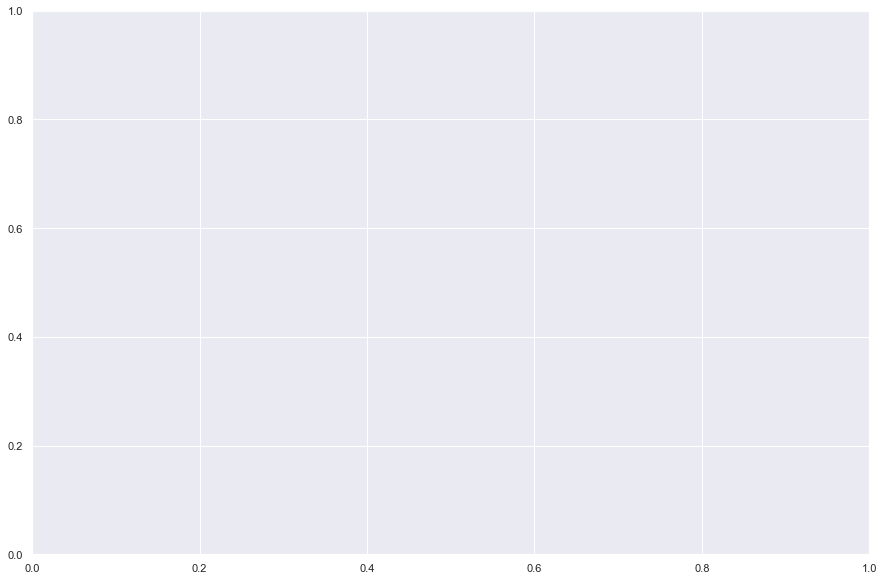

In [108]:
plt.figure(figsize=(15,10)) #sætter størrelsen på figuren
sns.regplot(x = 'yrbrn', y = 'happy', data = ess) #scatterplot af højde og vægt med fitted regressionslinje

Det giver fejl - hvorfor?

## Kategoriske varialbe i python

Lad os se nærmere på variablen `happy`. Tællinger for de enkelte værdier kan fås med `.value_counts()`, hvilket samtidig giver os overblik over værdierne.

In [72]:
ess['happy'].value_counts()

8                    457
9                    446
Extremely happy      278
7                    170
6                     57
5                     43
3                     16
4                     12
2                     11
1                      5
Extremely unhappy      1
Name: happy, dtype: int64

In [73]:
ess['happy'].dtypes

dtype('O')

Som det kan ses, indeholder variablen både numeriske og tekstuelle værdier. Typen er et "objekt", som hverken er tekst eller tal. 

Er ens variable indlæst som typen "objekt", bør man forholde sig til dem og ændrer dem på en af følgende måder:
- Konverter til tal: `pd.to_numeric(data)`
- Konverter til kategorisk: `.astype('category')`

Lad os først prøve at konvertere happy til kateogrisk.

In [74]:
ess['happycat'] = ess['happy'].astype('category')
ess['happycat'].value_counts()

8                    457
9                    446
Extremely happy      278
7                    170
6                     57
5                     43
3                     16
4                     12
2                     11
1                      5
Extremely unhappy      1
Name: happycat, dtype: int64

In [75]:
ess['happycat'].dtypes

CategoricalDtype(categories=['1', '2', '3', '4', '5', '6', '7', '8', '9',
                  'Extremely happy', 'Extremely unhappy'],
                 ordered=False)

`value_counts()` giver præcis det samme output efter konvertering, men vi kan nu se, at typen er anderledes (`CategoricalDtype`). Bemærk at `ordered` angiver, hvorvidt variabel skal betragtes nominalt eller ordinalt.

### Kategorisk og numerisk i python

Når man arbejder med kategoriske data i python, skal man tage aktiv beslutning om, hvordan variablen skal behandles. 

I modsætning til andre statistikprogrammer, har kategorier i python (pandas) ikke en underliggende numerisk værdi.

Vi kan godt få de underliggende koder, men det er ikke nogen, som vi kan refere til.

In [76]:
ess['happycat'].cat.codes.unique()

array([ 8,  7,  9,  3,  5,  6,  2,  4,  0,  1, -1, 10], dtype=int64)

In [77]:
any(ess['happycat'] == 10)

False

Bemærk også at kategorier både kan kodes som tal og tekst. I dette tilfælde er kategorierne kodet som tekst:

In [78]:
any(ess['happycat'] == 1)

False

In [79]:
any(ess['happycat'] == '1')

True

Det betyder, hvis man koder variable som kategoriske, skal de kun behandles som kategorisk - enten nominalt eller ordinalt.

Skal variablen behandles som interval, skal variablen derfor kodes om til numerisk.

### Nominale og ordinale variable i python

Inden vi ser på den numeriske konvertering, så lad os først kigge på, hvordan vi adskiller mellem nominale og ordinale i python.

Begge variabeltyper kodes som kategorisk, men forskellen ligger i, om variablen kodes som "ordered" eller ej.
- `ordered = False`: Nominal
- `ordered = True`: Ordinal

Lad os som eksempel kigge på 'alcfreq' variablen:

In [80]:
ess['alcfreq'].value_counts()

Several times a week      364
Once a week               309
2-3 times a month         264
Less than once a month    197
Every day                 133
Once a month              129
Never                     101
Name: alcfreq, dtype: int64

In [81]:
ess['alcfreq'].dtypes

dtype('O')

Ligesom 'happy' er 'alcfreq' indlæst som objekt-type - Det skal vi gøre noget ved!

Den simple løsning er blot at tvinge den til kategorisk, men specificerer ikke nærmere, bliver den lavet til nominalt, hvilket ikke stemmer med variablen (der er tydeligvis rangorden i værdierne).

In [82]:
ess['alcfreq'].astype('category') #denne kommando returnerer variablen som nominal

0          2-3 times a month
1       Several times a week
2                  Every day
3       Several times a week
4                  Every day
                ...         
1497    Several times a week
1498       2-3 times a month
1499             Once a week
1500             Once a week
1501       2-3 times a month
Name: alcfreq, Length: 1502, dtype: category
Categories (7, object): [2-3 times a month, Every day, Less than once a month, Never, Once a month, Once a week, Several times a week]

Måden vi løser dette, er ved først at lave vores eget "kategorisæt" eller kategoritype, som vi derefter sætter på variablen.

På vores egen type kan vi specificere, at værdier skal behandles ordinalt (`ordered = True`). De sættes i rangorden efter den rækkefølge, som de skrives ind.

In [111]:
from pandas.api.types import CategoricalDtype

alc_cats = CategoricalDtype(categories = ['Never', 'Less than once a month', 'Once a month', '2-3 times a month', 'Once a week', 'Several times a week', 'Every day'], ordered = True)
  
ess['alcfreq'] = ess['alcfreq'].astype(alc_cats)

Vi kan teste det efter ved at lave en variabel for, hvorvidt man drikker ugentligt.

In [84]:
ess['drink_weekly'] = ess['alcfreq'] >= 'Once a week'

In [85]:
ess.loc[0:10, ['alcfreq', 'drink_weekly']]

,alcfreq,drink_weekly
0,2-3 times a month,False
1,Several times a week,True
2,Every day,True
3,Several times a week,True
4,Every day,True
5,Several times a week,True
6,Once a week,True
7,Once a week,True
8,2-3 times a month,False
9,Once a week,True


## ØVELSE 2: Kategorisk variabel

1. Undersøg variablen `health` - hvilken type variablen er det? (og forstår python variablen rigtigt?)
2. Konverter variablen `health` til den korrekte type kategorisk variabel
3. Undersøg enten med `.sort_values(variabel)` eller med logiske operatorer (< >) om variablen vender rigtigt

Lav kategorisk type:
`kategori = CategoricalDtype(categories, ordered)`

Ændr til kategorisk:
`variabel = variabel.astype(category)`

### Bonus

- Prøv at lave en krydstabel med `pd.crosstab()` mellem health og alcfreq

## Fra kategorisk til numerisk

Vi har stadig ikke løst, hvordan vi kan bruge "happy" i modellen.

For at bruge "happy" i en regression, må vi betragte den som interval. Derfor skal den laves om til numerisk.

Da variablen har tekstværdier kan vi dog ikke bare tvinge den om:

In [95]:
ess['happy_num'] = pd.to_numeric(ess['happy'])

ValueError: Unable to parse string "Extremely happy" at position 6

### Rekodning af variable med pandas

Før at vi kan tvinge værdierne til numeriske, må vi først fortælle python, hvad tekstværdierne skal forstås som - altså rekode variablen.

Den mest ligetil måde at rekode er ved specificere en "dictionary".

En dictionary er en form for navngivet liste bestående af sæt af nøgler og værdier. En dictionary specificeres ved at bruge `{}`: `a_dict = {key: value, key: value}`.

For at bruge en dictionary til rekodning, danner vi først en dicionary, hvor keys er de værdier, som skal erstattes, og values er de værdier, som de skal erstattes med:

In [96]:
happy_replace = {'Extremely happy': 10, 'Extremely unhappy': 0}

Vi kan derefter bruge dictionary til at erstatte værdier med metoden `.replace()`

In [98]:
ess['happy_num'] = ess['happy'].replace(happy_replace)
ess['happy_num'].value_counts()

8     457
9     446
10    278
7     170
6      57
5      43
3      16
4      12
2      11
1       5
0       1
Name: happy_num, dtype: int64

Variablen består nu kun af numeriske værdier, og vi kan derfor tvinge den til at være numerisk:

In [99]:
ess['happy_num'] = pd.to_numeric(ess['happy_num'])

Vi kan nu modellere sammenhængen mellem alder og happy:

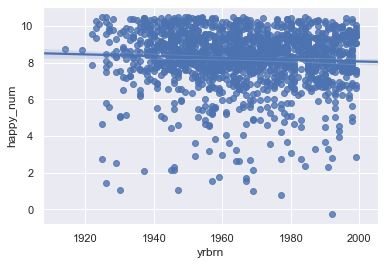

In [100]:
sns.regplot(x = 'yrbrn', y = 'happy_num', data = ess, y_jitter = 0.5)

Det tyder ikke på den helt store sammenhæng, men vi modellerer det alligevel!

## ØVELSE 3: Modellering af alder og happy

1. Sørg for at happy er konverteret til numerisk
2. Lav en lineær regressionsmodel for alder og happy

### Bonus

- Lav en lineær regressionsmodel, som indeholder flere X variable